In [7]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sb

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Problem Statement:
Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.

Hint:
Use sns.barplot() to create the bar plot and sort the companies by median salary.

In [18]:
df_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
df_US_top5 = df_US.groupby('company_name')['salary_year_avg'].median().reset_index()
df_US_top5 = df_US_top5.sort_values(by='salary_year_avg', ascending=False).head()

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_532\2915449064.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_US_top5, x='salary_year_avg', y='company_name', palette='viridis')


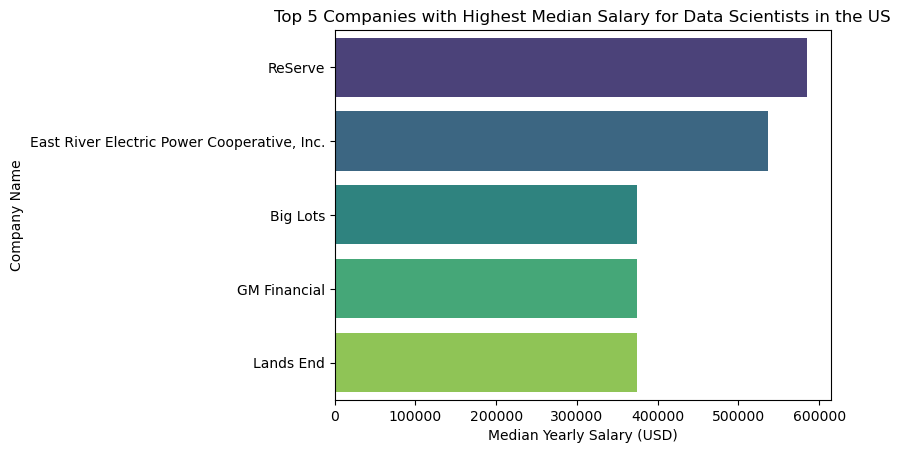

In [24]:
sb.barplot(data=df_US_top5, x='salary_year_avg', y='company_name', palette='viridis')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

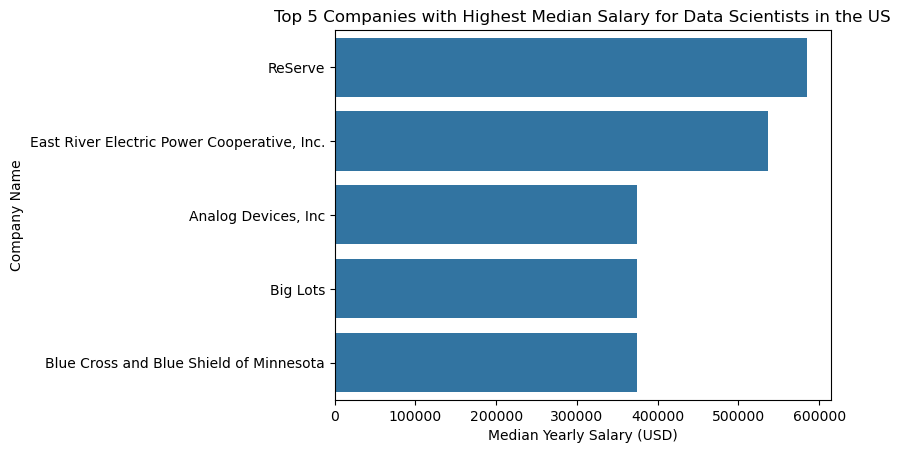

In [25]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sb.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

Problem Statement:
- Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) for Data Scientist job postings in the United States:

- Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
- Use 25 bins for the histogram and set the x-axis limit to 700,000.
- Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

Hint:
- Use the sns.histplot() function to create the histogram and filter the DataFrame using boolean indexing.

In [ ]:
df_US_DS = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()
df_US_DS

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
257,Data Scientist,Senior Bioinformatics Research Scientist- Data...,"Brighton, TN",via Work RN,Full-time,False,Georgia,2023-11-20 13:40:09,False,False,United States,year,103128.0,NaN,St. Jude Children's Research Hospital,"[r, electron]","{'libraries': ['electron'], 'programming': ['r']}"
450,Data Scientist,Data Defense Developer - USDS,"Mountain View, CA",via LinkedIn,Full-time,False,"New York, United States",2023-12-02 13:19:59,False,True,United States,year,157500.0,NaN,TikTok,"[go, python, java, mongo, redis, aws, pandas, ...","{'cloud': ['aws'], 'databases': ['redis'], 'li..."
1257,Data Scientist,Data Scientist,"Minneapolis, MN",via Adzuna,Full-time,False,"Illinois, United States",2023-02-21 13:25:40,False,True,United States,year,70700.0,NaN,Target,"[java, scala, python, r, kotlin, sql, spark]","{'libraries': ['spark'], 'programming': ['java..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785324,Data Scientist,Data Science Manager,"Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-11 06:20:33,False,True,United States,year,234500.0,NaN,TikTok,"[python, sql, r, neo4j, pandas, spark, tensorf...","{'analyst_tools': ['tableau'], 'databases': ['..."
785488,Data Scientist,Data Scientist,"New York, NY",via BeBee,Full-time,False,"New York, United States",2023-11-27 06:01:23,False,False,United States,year,115000.0,NaN,Winston Fox,"[python, r]","{'programming': ['python', 'r']}"
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


C:\Users\Korisnik\AppData\Local\Temp\ipykernel_532\2281286085.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(data=df_DS_US.salary_year_avg, bins=25, palette='pastel')


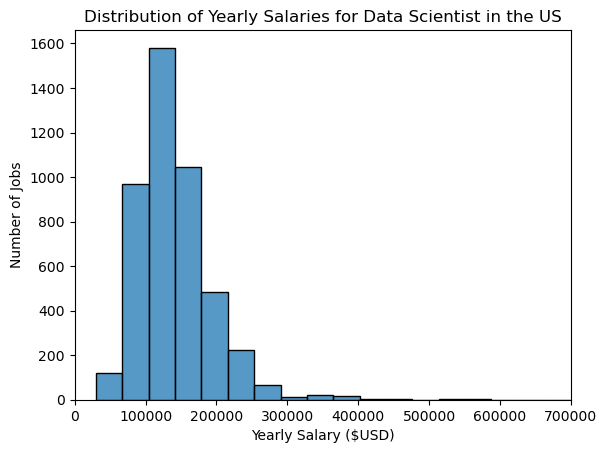

In [34]:
sb.histplot(data=df_DS_US.salary_year_avg, bins=25, palette='pastel')
plt.title('Distribution of Yearly Salaries for Data Scientist in the US')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 700000)
plt.show()

Problem Statement:
- Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

- Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
- Set the x-axis limit to 300,000 and format it as $100k.
- Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

Hint:
- Use the sns.boxplot() function to visualize the salary distributions and format the x-axis labels to reflect thousands as 'k' using plt.FuncFormatter.

In [35]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

In [45]:
# Filter for Data Analyst, Data Engineer, and Data Scientist job postings in India
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
india_jobs = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))]

# Drop NaN values from the 'salary_year_avg' column
india_jobs = india_jobs.dropna(subset=['salary_year_avg'])
india_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
7946,Data Engineer,Data Engineering Manager,"Mysuru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-28 13:10:54,False,False,India,year,147500.0,NaN,66degrees,"[sql, gcp, bigquery]","{'cloud': ['gcp', 'bigquery'], 'programming': ..."
9143,Data Scientist,Manager - Data Science,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-12 13:28:49,False,False,India,year,79200.0,NaN,BitGo,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781832,Data Engineer,"Drug Discovery Informatics Data Engineer, Hyde...","Hyderabad, Telangana, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 06:12:54,True,False,India,year,147500.0,NaN,Schrödinger,"[python, sql, airflow, git, svn, docker, kuber...","{'libraries': ['airflow'], 'other': ['git', 's..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


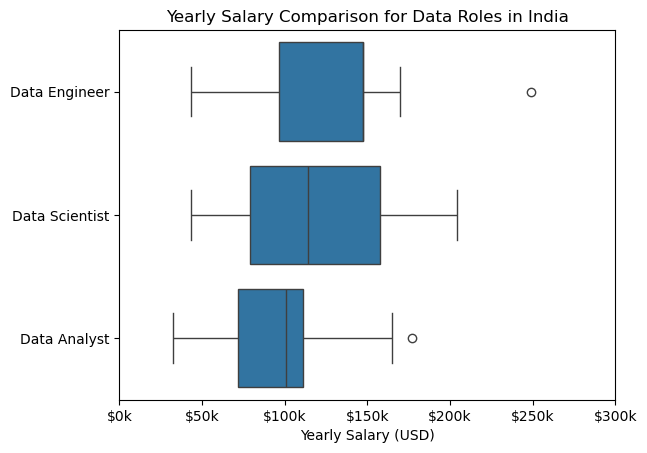

In [48]:
sb.boxplot(data=india_jobs, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()


Problem Statement:
- Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
- Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.
Hint:
- Use sns.violinplot() with the x parameter set to job_country and the y parameter set to salary_year_avg.
- Utilize plt.ylim() and plt.gca().yaxis.set_major_formatter() to set and format the salary axis.

In [ ]:
df_violin = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')]

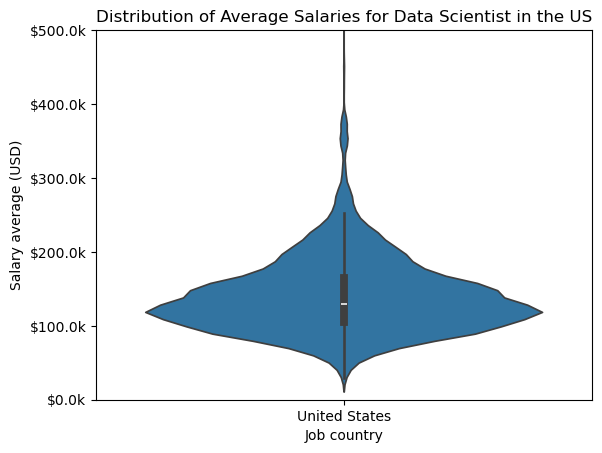

In [55]:
sb.violinplot(data=df_violin, x='job_country', y='salary_year_avg')
plt.title('Distribution of Average Salaries for Data Scientist in the US')
plt.xlabel('Job country')
plt.ylabel('Salary average (USD)')
plt.ylim(0, 500000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)/1000}k'))
plt.show()